In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
n_samples = 2
x = np.random.rand(n_samples) * 2 - 1
true_m = 2.3
true_n = -0.2
noise_std = 0.3
y = true_m * x + true_n + np.random.randn(n_samples) * noise_std

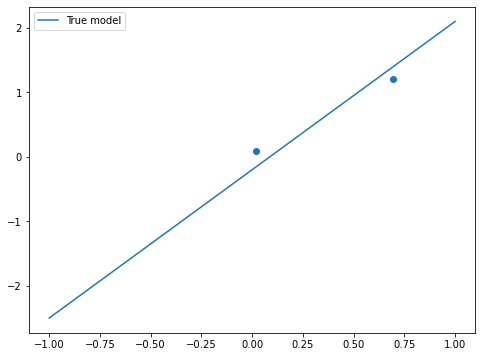

In [59]:
fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('white')
plt.scatter(x, y)

x_lin = np.linspace(-1, 1, 100)
y_model = true_m * x_lin + true_n
plt.plot(x_lin, y_model, label='True model')

plt.legend()

## Prior

In [60]:
w_0 = np.array([0.0, 0.0]).reshape([2, 1])
tau = 3.0
V_0 = tau**2 * np.eye(2)

Text(0.5, 1.0, 'Samples from prior')

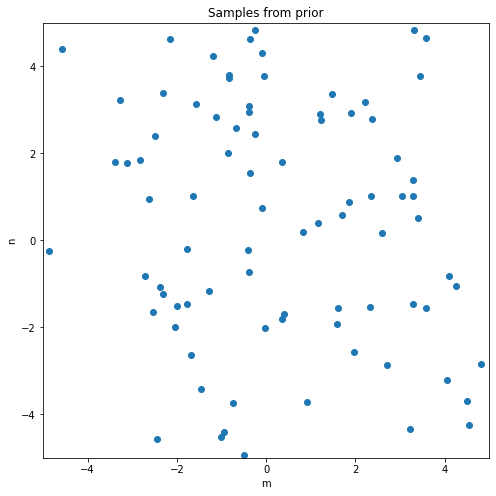

In [61]:
prior_samples = np.random.multivariate_normal(w_0.flatten(), V_0, size=100)

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
plt.scatter(prior_samples[:, 0], prior_samples[:, 1])

plt.axis([-5, 5, -5, 5])
plt.xlabel('m')
plt.ylabel('n')
plt.title('Samples from prior')

## Posterior

In [62]:
extended_x = np.stack([x, np.ones(n_samples)], axis=1)

V_N = noise_std ** 2 * np.linalg.inv(
    noise_std ** 2 * np.linalg.inv(V_0) 
    + np.matmul(extended_x.T, extended_x))
w_N = (np.matmul(np.matmul(V_N, np.linalg.inv(V_0)), w_0) 
       + 1/noise_std**2 * np.matmul(np.matmul(V_N, extended_x.T), y.reshape([-1, 1])))

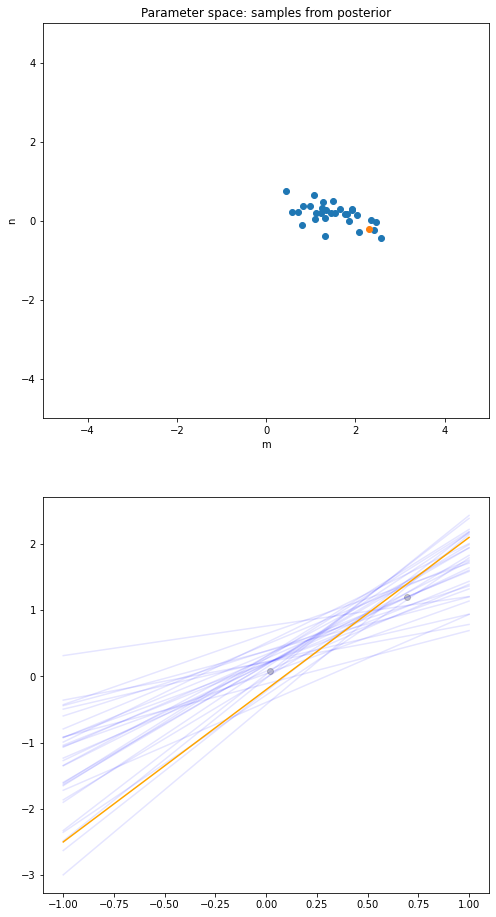

In [63]:
posterior_samples = np.random.multivariate_normal(
    w_N.flatten(), V_N, size=30)

fig = plt.figure(figsize=(8, 16))
fig.set_facecolor('white')

plt.subplot(2, 1, 1)
plt.scatter(posterior_samples[:, 0], posterior_samples[:, 1])
plt.scatter(true_m, true_n)
plt.axis([-5, 5, -5, 5])
plt.xlabel('m')
plt.ylabel('n')
plt.title('Parameter space: samples from posterior')

plt.subplot(2, 1, 2)
plt.scatter(x, y, alpha=0.2, c='black')

x_lin = np.linspace(-1, 1, 100)
for i in range(len(posterior_samples)):
    y_posterior = posterior_samples[i, 0] * x_lin + posterior_samples[i, 1]
    plt.plot(x_lin, y_posterior, alpha=0.1, c='blue')
    
y_model = true_m * x_lin + true_n
plt.plot(x_lin, y_model, c='orange')